<a href="https://colab.research.google.com/github/AndTheLordSaid/Thuli/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import pandas as pd
import seaborn as seab
import matplotlib.pyplot as mplot
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

%matplotlib inline

In [113]:
#Reading the csv(data) file for credit card fraud detection
#Then display the first five using head()
df=pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


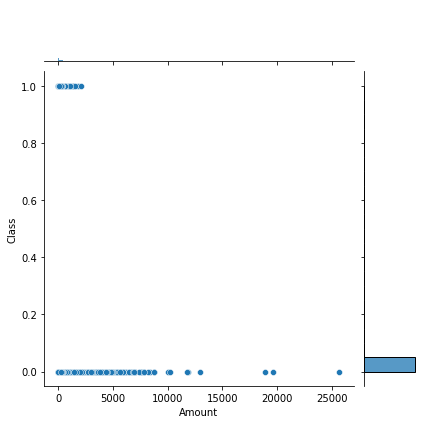

In [115]:
#Time column and Amount column need to be normalized
seab.jointplot(df['Amount'], df['Class'])

In [116]:
#Call and instantiate RobustScaler
robsca=RobustScaler()

#Make new dataframe of Time & Amount columns using OG dataframe
df_small = df[['Time','Amount']]
df_small= pd.DataFrame(robsca.fit_transform(df_small))

#scale the new columns
#concatinate both dataframes
df_small.columns = ['scaled_Time','scaled_Amount']
df=pd.concat([df,df_small],axis=1)

#delete old unscaled columns
df.drop(['Time','Amount'], axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Time,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [104]:
#checking how many authentic and fraudulent transactions there are
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


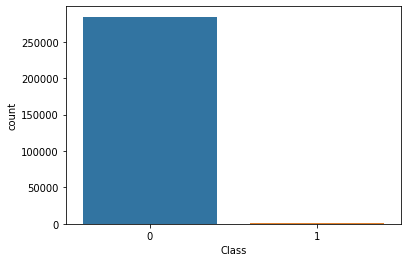

In [105]:
#Since this data has more authentic transactions 
#This might make the model very bad
#I'm going to try to balance/clean the data even more

#just visualizing the data here
seab.countplot(df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


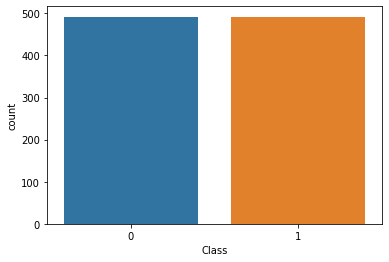

In [17]:
#remove the authentic transactions from data
auth_Transac = df[df['Class']==0]
#remove the fraudulent transactions from data
frau_Transac = df[df['Class']==1]

auth_Transac = auth_Transac.sample(frac=1)

auth_Transac = auth_Transac[:492]

new_df = pd.concat([auth_Transac,frau_Transac])
new_df = new_df.sample(frac=1)

#visualzing data
new_df['Class'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


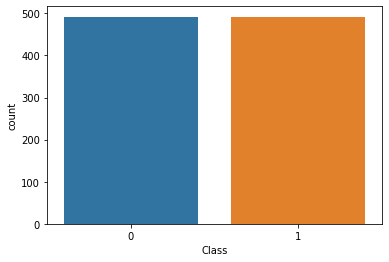

In [18]:
#visualizing balanced data
seab.countplot(new_df['Class'])

In [74]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)


In [108]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train,y_train)

reslts =sv.predict(X_test)

print(classification_report(y_test,reslts))
print('\n\n')
print(confusion_matrix(y_test,reslts))
print('\n')
print('SupportVectorClassifier is ',round(accuracy_score(y_test,reslts)*100,2),' accurate at predicting credit card fraud.')
print('-----------------------------------------------------------------------------------')

              precision    recall  f1-score   support

           0       0.90      0.99      0.94        92
           1       0.99      0.90      0.95       105

    accuracy                           0.94       197
   macro avg       0.95      0.95      0.94       197
weighted avg       0.95      0.94      0.94       197




[[91  1]
 [10 95]]


SupportVectorClassifier is  94.42  accurate at predicting credit card fraud.
-----------------------------------------------------------------------------------


In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

reslts=rf.predict(X_test)

print(classification_report(y_test,reslts))
print('\n\n')
print(confusion_matrix(y_test,reslts))
print('\n')
print('KNeighborsClassifier is ',round(accuracy_score(y_test,reslts)*100,2),' accurate at predicting credit card fraud.')
print('-----------------------------------------------------------------------------------')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.98      0.92      0.95       105

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197




[[90  2]
 [ 8 97]]


KNeighborsClassifier is  94.92  accurate at predicting credit card fraud.
-----------------------------------------------------------------------------------


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

reslts=rf.predict(X_test)

print(classification_report(y_test,reslts))
print('\n\n')
print(confusion_matrix(y_test,reslts))
print('\n')
print('RandomForestClassifier is ',round(accuracy_score(y_test,reslts)*100,2),' accurate at predicting credit card fraud.')
print('-----------------------------------------------------------------------------------')

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        92
           1       0.98      0.92      0.95       105

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197




[[90  2]
 [ 8 97]]


RandomForestClassifier is  94.92  accurate at predicting credit card fraud.
-----------------------------------------------------------------------------------


In [94]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

reslts = lr.predict(X_test)

print(classification_report(y_test,reslts))
print('\n\n')
print(confusion_matrix(y_test,reslts))
print('\n')
print('LogisticRegression is ',round(accuracy_score(y_test,reslts)*100,2),' accurate at predicting credit card fraud.')
print('-----------------------------------------------------------------------------------')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        92
           1       0.96      0.94      0.95       105

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197




[[88  4]
 [ 6 99]]


LogisticRegression is  94.92  accurate at predicting credit card fraud.
-----------------------------------------------------------------------------------


In [95]:

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

reslts = dt.predict(X_test)

print(classification_report(y_test,reslts))
print('\n\n')
print(confusion_matrix(y_test,reslts))
print('\n')
print('DecisionTreeClassifier is ',round(accuracy_score(y_test,reslts)*100,2),' accurate at predicting credit card fraud.')

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        92
           1       0.90      0.94      0.92       105

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197




[[81 11]
 [ 6 99]]


DecisionTreeClassifier is  91.37  accurate at predicting credit card fraud.
